<a href="https://colab.research.google.com/github/shila121/projects/blob/main/customer_finance_complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the problem statement
Here, we are trying to study customer complaints and analyse how business is planning to achieve this.Target colum is consumer_disputed?

#2.Data Analysis
we wil try to understand the data and try to draw some relationships hidden.The different steps are as below:

1.   Hypothesis testing
2.   EDA(univariate/Bivariate)
3.   Missing Data
4.   Numerical Data
5.   Outliers
6.   Categorical Data












# Step 1: Hypothesis Testing

*   Null hypothesis:There is no relationship between feature and the target
*   Alternate hypothesis:There is significant relationship between target and feature



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import dataset consumer_complaints
data = pd.read_csv('consumer_complaints.csv')

# visualize the dataset
print('visualize the dataset')
print(data.head())
print('*'*80)
print(data.columns,len(data.columns),data.shape)

# getting the categorical columns
catCols = data.select_dtypes('object').columns
print('categorical columns:',catCols,len(catCols))
print('*'*80)

# getting the numerical columns
numCols = data.select_dtypes('number').columns
print('numerical columns:',numCols,len(numCols))
print('*'*80)

# convert taget into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['consumer_disputed?'] = le.fit_transform(data['consumer_disputed?'])
print(data['consumer_disputed?'].unique())


visualize the dataset
  date_received           product  ... consumer_disputed? complaint_id
0    08/30/2013          Mortgage  ...                Yes       511074
1    08/30/2013          Mortgage  ...                Yes       511080
2    08/30/2013  Credit reporting  ...                 No       510473
3    08/30/2013      Student loan  ...                Yes       510326
4    08/30/2013   Debt collection  ...                Yes       511067

[5 rows x 18 columns]
********************************************************************************
Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object') 18 (555957, 18)
categorical columns: Index(['date_received', 'produc

In [2]:
# we will carry out z-test on numerical columns to observe their impact

from statsmodels.stats import weightstats as stests
significant_numCols,in_significant_numCols = [],[]

for i in numCols:
  p_val = stests.ztest(data[i],data['consumer_disputed?'])
  p_val = p_val[1]
  print('column:',i,'p_val:',p_val)
  if p_val < 0.05 :
    status = 'Reject null hypothesis,Significant predictor'
    significant_numCols.append(i)
    print('status:',status)
    print('*'*80)

  else:
    status = 'Accept Null hypothesis,Insignificant predictor'
    in_significant_numCols.append(i)
    print('status:',status)
    print('*'*80)

print('significant numeric variables:',significant_numCols,len(significant_numCols))
print('in-significant numeric variables:',in_significant_numCols,len(in_significant_numCols))

column: complaint_id p_val: 0.0
status: Reject null hypothesis,Significant predictor
********************************************************************************
significant numeric variables: ['complaint_id'] 1
in-significant numeric variables: [] 0


In [3]:
# we will carry out chi2 test on categorical data to observe the impact
significant_catCols,in_significant_catCols = [],[]

from scipy.stats import chi2_contingency
significant_catCols,in_significant_catCols = [],[]
for i in catCols:
  if i != 'consumer_disputed?':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data['consumer_disputed?']))
    print('column:',i,'p_val:',p_val)
    if p_val < 0.05 :
      status = 'Reject null hypothesis,Significant predictor'
      significant_catCols.append(i)
      print('status:',status)
      print('*'*80)
    else:
      status = 'Accept Null hypothesis,Insignificant predictor'
      in_significant_catCols.append(i)
      print('status:',status)
      print('*'*80)

print('significant categorical variables:',significant_catCols,len(significant_catCols))
print('in-significant categorical variables:',in_significant_catCols,len(in_significant_catCols))

column: date_received p_val: 5.326513816578683e-246
status: Reject null hypothesis,Significant predictor
********************************************************************************
column: product p_val: 0.0
status: Reject null hypothesis,Significant predictor
********************************************************************************
column: sub_product p_val: 0.0
status: Reject null hypothesis,Significant predictor
********************************************************************************
column: issue p_val: 0.0
status: Reject null hypothesis,Significant predictor
********************************************************************************
column: sub_issue p_val: 0.0
status: Reject null hypothesis,Significant predictor
********************************************************************************
column: consumer_complaint_narrative p_val: 0.019174165442962448
status: Reject null hypothesis,Significant predictor
************************************************

# Step 2: EDA(Univariate/Bivariate)

not able to plot: complaint_id


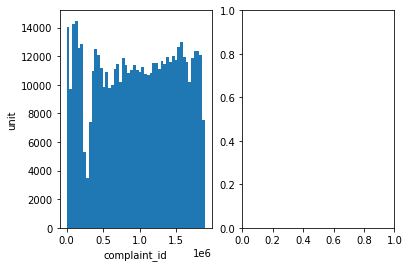

In [4]:
# univariate analysis of numerical columns by histogram and boxplot
for i in numCols:
  try:
    plt.subplot(1,2,1)
    plt.hist(data[i],bins = 50)
    plt.xlabel(i)
    plt.ylabel('unit')

    plt.subplot(1,2,2)
    plt.box(data[i],bins = 50)
    plt.xlabel(i)
    plt.ylabel('unit')
    plt.show()
  except:
    print('not able to plot:',i)
    pass

In [5]:
# univariate analysis of categorical columns by value_counts
for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('*'*80)

column: date_received
08/27/2015    963
06/26/2014    916
08/26/2015    912
07/08/2015    827
08/12/2015    819
             ... 
04/25/2016     11
12/24/2011     11
12/25/2011     10
04/24/2016      6
03/09/2014      5
Name: date_received, Length: 1608, dtype: int64
********************************************************************************
column: product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64
********************************************************************************
column: sub_product
Other mortgage                            74319
Conventional fixed mortgage               57182
Checking account                    

                    consumer_disputed?  complaint_id
consumer_disputed?            1.000000     -0.029305
complaint_id                 -0.029305      1.000000


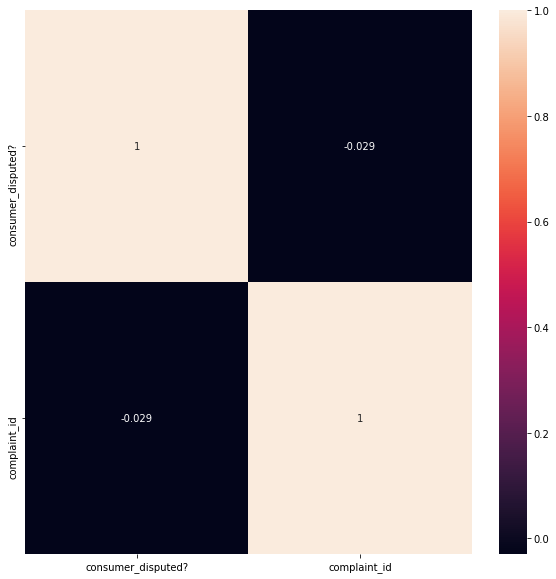

In [6]:
# Bi-variate analysis of numerical columns by co-relation mation

import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize =(10,10))
sns.heatmap(matrix,annot= True)

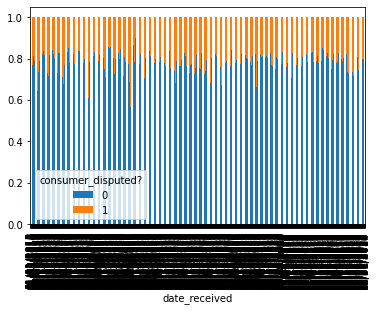

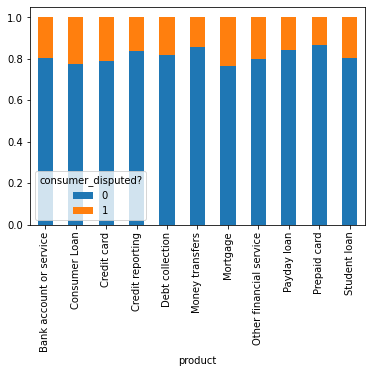

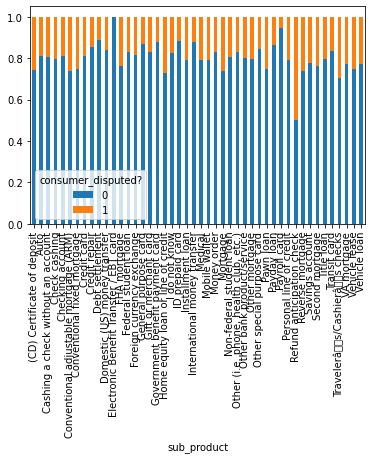

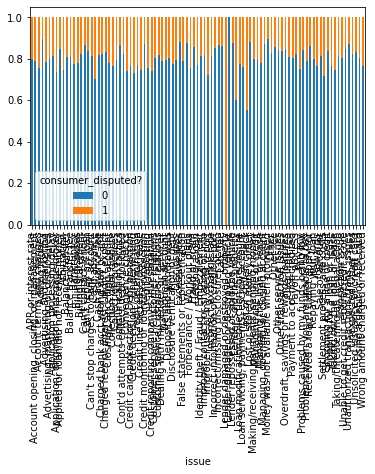

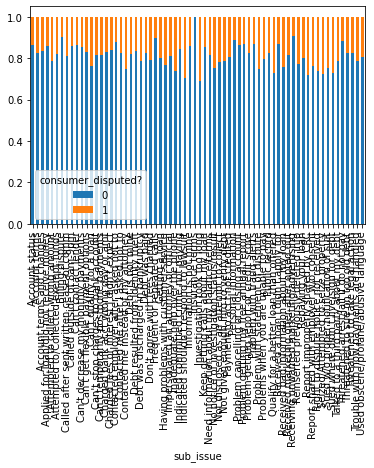

ValueError: ignored

<Figure size 432x288 with 1 Axes>

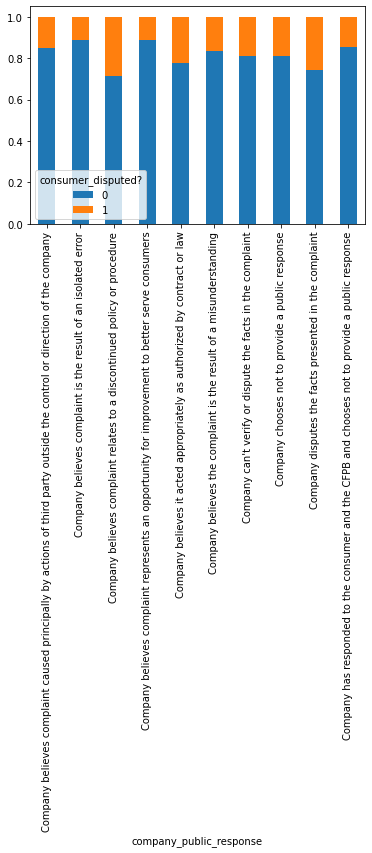

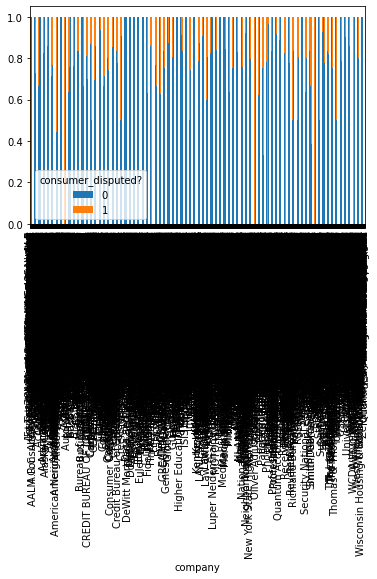

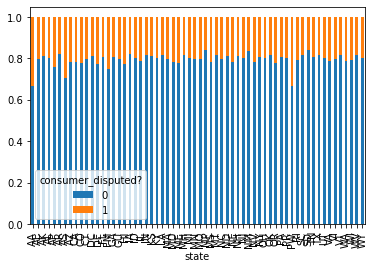

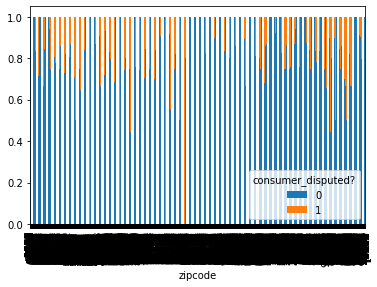

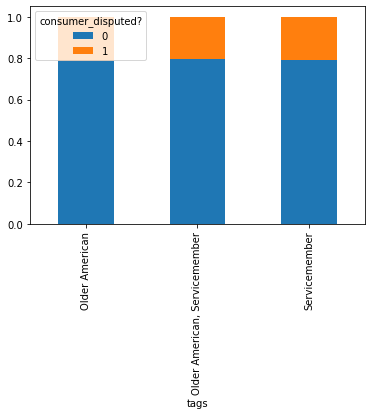

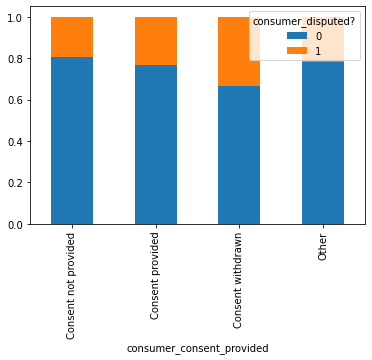

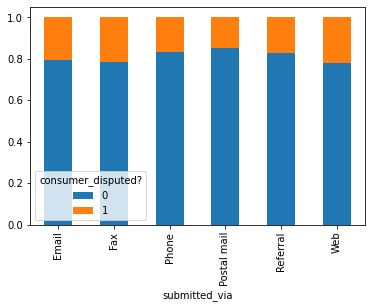

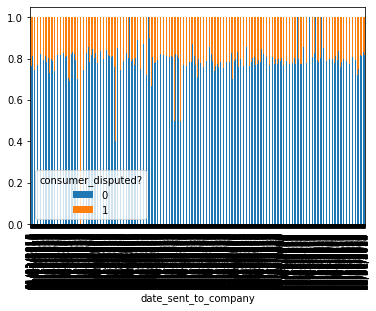

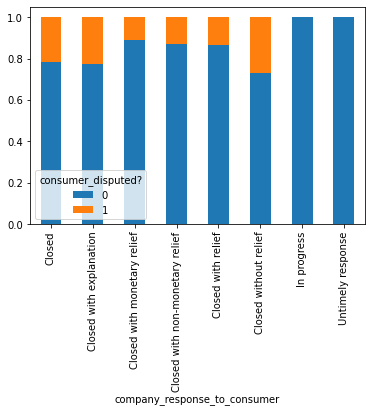

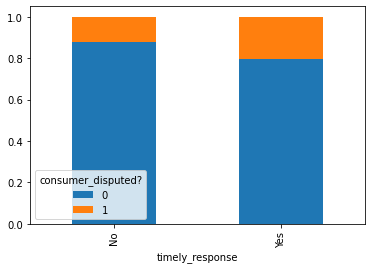

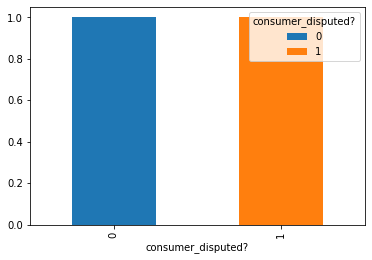

In [7]:
# Bi-variate analysis of categorical data
for i in catCols:
  try:
    category = pd.crosstab(data[i],data['consumer_disputed?'])
    category.div(category.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
    plt.show()
  except:
    print('not able to plot:',i)
    pass

# Step 3. Missing Data


In [8]:
# let us analyse if the data contains any missing values

print(data.isnull().sum())
# missing data present in the data

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64


# Step 4:Numerical Data Analysis

In [9]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize numerical columns
print(data[numCols].head())
print('*'*80)

# ->2. make a list of descrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('discrete numerical columns',discrete_numCols,len(discrete_numCols))
print('*'*80)

# ->3. visualize discrete numerical columns
print(data[discrete_numCols].head())
print('*'*80)

# ->4. make a list of continuous numerical columns
continous_numCols = [var for var in numCols if len(data[var].unique()>20)]
print('continuous numerical columns',continous_numCols,len(continous_numCols))
print('*'*80)

# ->5. visualize continuous numerical columns
print(data[continous_numCols].head())
print('*'*80)

numerical columns: Index(['complaint_id'], dtype='object') 1
   complaint_id
0        511074
1        511080
2        510473
3        510326
4        511067
********************************************************************************
discrete numerical columns [] 0
********************************************************************************
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
********************************************************************************
continuous numerical columns ['complaint_id'] 1
********************************************************************************
   complaint_id
0        511074
1        511080
2        510473
3        510326
4        511067
********************************************************************************


# Step 5. Outlier Analysis

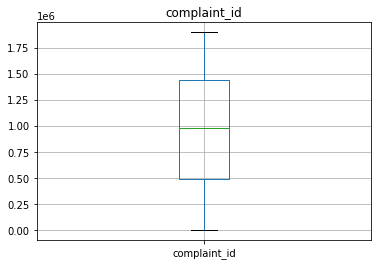

In [10]:
def find_outliers(df,var):
  df= df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()

for i in continous_numCols:
  find_outliers(data,i)

# Step 6. Categorical data Analysis

In [11]:
# -> 1. visualize the categorical data
print('categorical columns:',catCols,len(catCols))
print('*'*80)
print(data[catCols].head())
print('*'*80)

# -> 2. cardinality of categorical columns
print('cardinality of columns:')
print(data[catCols].nunique())
print('*'*80)

# -> 3. analyse rare columns
def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['consumer_disputed?'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(i)
  print('*'*80)
  print(analyse_rare_vars(data,i,0.01))
  print()


categorical columns: Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?'],
      dtype='object') 17
********************************************************************************
  date_received           product  ... timely_response consumer_disputed?
0    08/30/2013          Mortgage  ...             Yes                  1
1    08/30/2013          Mortgage  ...             Yes                  1
2    08/30/2013  Credit reporting  ...             Yes                  0
3    08/30/2013      Student loan  ...             Yes                  1
4    08/30/2013   Debt collection  ...             Yes                  1

[5 rows x 17 columns]
****************************************************************

# 3.Feature Engineering
Here,we will deal with all the problems like below:


1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   categorical data encoding
6.   feature scaling
7.   feature selection











In [12]:
# -> 1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['consumer_disputed?'],random_state = 0,test_size = 0.2 )
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(444765, 18) (111192, 18) (444765,) (111192,)


In [13]:
# -> 2. missing value treatment
# get the categoriacal variable from vars_with_na
# ------------------------------------------------------------------------------
cat_var_with_na = [var for var in data.columns if data[var].isnull().sum()>0 and data[var].dtypes =='object']
print('categorical columns with null values',cat_var_with_na,len(cat_var_with_na))


# # visualise the missing categorical data in X_train
print(X_train[cat_var_with_na].isnull().mean()*100)

# replacing missing values with 'missing' labels
X_train[cat_var_with_na] = X_train[cat_var_with_na].fillna('Missing')
X_test[cat_var_with_na] = X_test[cat_var_with_na].fillna('Missing') 

print(X_train[cat_var_with_na].isnull().sum())
print(X_test[cat_var_with_na].isnull().sum())





categorical columns with null values ['sub_product', 'sub_issue', 'consumer_complaint_narrative', 'company_public_response', 'state', 'zipcode', 'tags', 'consumer_consent_provided'] 8
sub_product                     28.496847
sub_issue                       61.773971
consumer_complaint_narrative    87.966454
company_public_response         84.672805
state                            0.892157
zipcode                          0.820658
tags                            85.975740
consumer_consent_provided       77.814351
dtype: float64
sub_product                     0
sub_issue                       0
consumer_complaint_narrative    0
company_public_response         0
state                           0
zipcode                         0
tags                            0
consumer_consent_provided       0
dtype: int64
sub_product                     0
sub_issue                       0
consumer_complaint_narrative    0
company_public_response         0
state                           0
zipcode   

In [14]:
# get the numerical columns with na values
# # -------------------------------------------
num_var_with_na = [var for var in data.columns if data[var].isnull().sum()>0 and data[var].dtypes != 'object']
print('numerical columns with null values:',num_var_with_na,len(num_var_with_na))

# visualize their percentage
print(X_train[num_var_with_na].isnull().mean()*100)

# visualize the data
print(X_train[num_var_with_na].head())

numerical columns with null values: [] 0
Series([], dtype: float64)
Empty DataFrame
Columns: []
Index: [263264, 284712, 68846, 292096, 110986]


In [15]:

# replace the numerical missing values with mode
import warnings
warnings.simplefilter(action='ignore')

for var in num_var_with_na:
  # mode = X_train[var].median()
  mode = X_train[var].mode()[0]

# creating a new column with the record of missing
  X_train[var+'_na'] = np.where(X_train[var].isnull(),1,0)
  X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)


# replacing missing values in train 
for var in  num_var_with_na :
  mode = X_train[var].mode()[0]
  X_train[var] = X_train[var].fillna(mode)

# replacing missing values in test
for var in  num_var_with_na :
  mode = X_train[var].mode()[0]
  X_test[var] = X_test[var].fillna(mode)   


print(X_train[num_var_with_na].isnull().sum())
print(X_test[num_var_with_na].isnull().sum())

Series([], dtype: float64)
Series([], dtype: float64)


In [16]:
# ->step 3. handling outliers -->skipping


In [17]:
# ->step 4. handling rare labels
print('categorical columns:',catCols,len(catCols))


cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']


def find_frequent_labels(df,var,rare_percent):
  df = df.copy()
  tmp = df.groupby(var)['consumer_disputed?'].count()/len(df)
  return tmp[tmp>rare_percent].index

print('categorical variables:',cat_vars,len(cat_vars))

for var in cat_vars:

  # find the frequent categories
  frequent_ls = find_frequent_labels(X_train,var,0.01)

  # replace rarecategorical columns with 'Rare' labels
  X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')

  X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')


categorical columns: Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?'],
      dtype='object') 17
categorical variables: ['date_received', 'product', 'sub_product', 'issue', 'sub_issue', 'consumer_complaint_narrative', 'company_public_response', 'company', 'state', 'zipcode', 'tags', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_company', 'company_response_to_consumer', 'timely_response'] 16


In [18]:
#  -> 5.Encoding categorical variables
def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'consumer_disputed?')

print(X_train.shape,X_test.shape)
print(X_train.head())

(444765, 18) (111192, 18)
        date_received  product  ...  consumer_disputed?  complaint_id
263264              0        2  ...                   0       1510536
284712              0        4  ...                   0       1539575
68846               0        4  ...                   0        791396
292096              0        1  ...                   0       1591733
110986              0        2  ...                   0        987713

[5 rows x 18 columns]


In [19]:
# -> 6.feature scaling
train_vars = [var for var in X_train.columns if var not in ['consumer_disputed?']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['date_received', 'product', 'sub_product', 'issue', 'sub_issue', 'consumer_complaint_narrative', 'company_public_response', 'company', 'state', 'zipcode', 'tags', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_company', 'company_response_to_consumer', 'timely_response', 'complaint_id'] 17


In [20]:
# -> 7. feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['consumer_disputed?']
y_test = X_test['consumer_disputed?']

# drop unnecessary variables from our training and testing sets
X_train.drop(['consumer_disputed?'], axis=1, inplace=True)
X_test.drop(['consumer_disputed?'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

        date_received  product  ...  consumer_disputed?  complaint_id
263264            0.0     -0.4  ...                   0      0.561854
284712            0.0      0.0  ...                   0      0.592261
68846             0.0      0.0  ...                   0     -0.191160
292096            0.0     -0.6  ...                   0      0.646876
110986            0.0     -0.4  ...                   0      0.014404

[5 rows x 18 columns]


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [21]:
sel_.get_support()

array([False, False, False,  True,  True, False, False,  True, False,
       False, False,  True,  True, False,  True, False,  True])

In [22]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 17
selected features: 7
features with coefficients shrank to zero: 10


In [23]:
# print the selected features
selected_feats

Index(['issue', 'sub_issue', 'company', 'consumer_consent_provided',
       'submitted_via', 'company_response_to_consumer', 'complaint_id'],
      dtype='object')

# Checking which model will perform better

In [24]:
# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


# 1- Logistic Regression
# 2- K-nearest neighbors classification
# 3- support vector machine
# 4- naive bayes
# 5- random forest classification
# -----------------------------------
# Function to calculate mean absolute error

def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  
  # print('Name:',name)
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)

Name: Logistic Regression ,Cross Validation Score = 0.7984
Name: Linear svc ,Cross Validation Score = 0.7984
Name: Random forest classifier ,Cross Validation Score = 0.7601
Name: knn  ,Cross Validation Score = 0.7647
Name: Guassian NB  ,Cross Validation Score = 0.7008
Name: Decision TreeClassifier ,Cross Validation Score = 0.6912
Name: xg booster ,Cross Validation Score = 0.7984


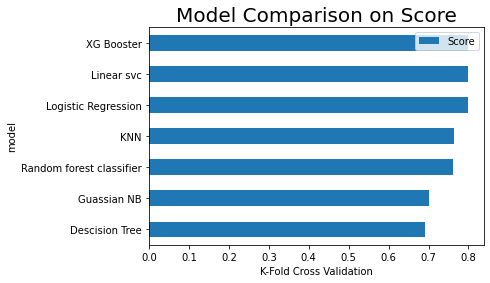

In [25]:
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()


In [26]:
# Model selected:Logistic Regression

# Model Optimization by hyper-parameter tuning
-we will ty to find optimal hyper-parameters for gradient boosting regrssor

In [27]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

In [28]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)

In [29]:

# Fit on the traing model

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=200,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='saga', tol=0.01,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4fe2eaf790>,
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_tra

In [30]:
print(clf.best_params_)

{'C': 2.195254015709299, 'penalty': 'l1'}


In [31]:
print(clf.score(X_test , y_test))

0.7980160443197353


In [32]:
log = LogisticRegression(C = 2.195254015709299, penalty='l1', solver='liblinear')
log.fit(X_train,y_train)
Y_pred = log.predict(X_test)
log.score(X_train, y_train)
acc_log_reg = round(log.score(X_train, y_train) * 100, 2)
acc_log_reg

79.84

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[88733     0]
 [22459     0]]
0.7980160443197353


In [44]:
# #creating a dictionary for products
# data['category_id']=data['product'].factorize()[0]
# data.head()

# category_id_df = data[['product', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id','product']].values)



In [43]:

# fig, ax = plt.subplots(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu", xticklabels=category_id_df[['product']].values, yticklabels=category_id_df[['product']].values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [34]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     88733
           1       0.00      0.00      0.00     22459

    accuracy                           0.80    111192
   macro avg       0.40      0.50      0.44    111192
weighted avg       0.64      0.80      0.71    111192

